In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import zipfile
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization
import warnings
warnings.filterwarnings('ignore')
import pathlib

2024-02-18 19:24:13.723881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-02-18 19:24:13.723991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-02-18 19:24:13.845105: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_dir=pathlib.Path('/kaggle/input/chest-xray-pneumonia/chest_xray/train')
test_dir=pathlib.Path('/kaggle/input/chest-xray-pneumonia/chest_xray/test')
val_dir=pathlib.Path('/kaggle/input/chest-xray-pneumonia/chest_xray/val')

In [4]:
print("Number of Images in Train:", len(list(train_dir.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(test_dir.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(val_dir.glob("*/*.jpeg"))))

Number of Images in Train: 5216

Number of Images in Test: 624

Number of Images in Validation: 16


In [5]:
train_df=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=42,
    validation_split=0.2,
    subset='training',
    image_size=(150,150),
    batch_size=32
)

Found 5216 files belonging to 2 classes.

Using 4173 files for training.


In [6]:
val_df = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
seed=42,
validation_split=0.3,
subset='validation',
image_size=(150,150),
batch_size=32
)

Found 5216 files belonging to 2 classes.

Using 1564 files for validation.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_train_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/train'

train_generator=train_datagen.flow_from_directory(
    image_train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'

)

Found 5216 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
model=Sequential()
# model.add(Conv2D(512,(3,3),strides=1,activation='relu',input_shape=(120,120,3)))
# model.add(MaxPooling2D((2,2),strides=2))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3),strides=1, activation='relu'))
model.add(MaxPooling2D((2, 2),strides=2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


In [9]:
from tensorflow.keras.optimizers import Adagrad

optimizer=Adagrad(learning_rate=0.02)

model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['accuracy'])

In [10]:

!pip install visualkeras








   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 18.1 MB/s eta 0:00:00




In [11]:
import visualkeras

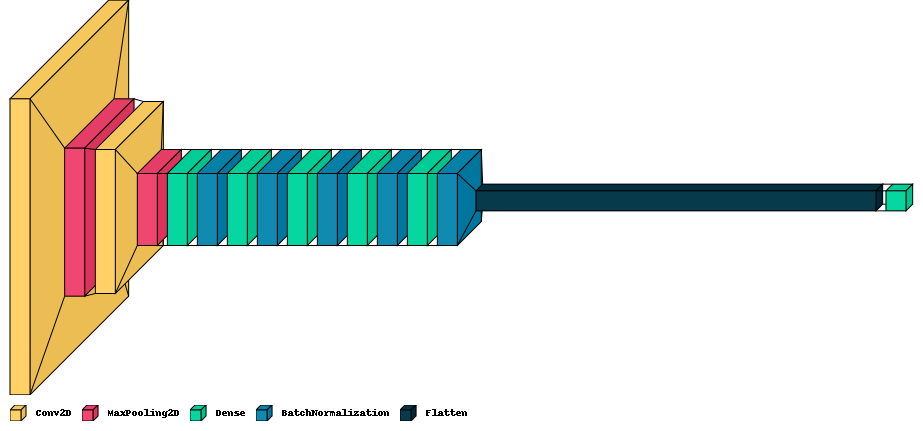

In [12]:
visualkeras.layered_view(model,scale_xy=2,legend=True)

In [13]:
history = model.fit(train_df, validation_data=val_df, epochs=10)

Epoch 1/10



I0000 00:00:1708284292.412117      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 [==============================] - 33s 199ms/step - loss: 0.0695 - accuracy: 0.9070 - val_loss: 0.6563 - val_accuracy: 0.2583

Epoch 2/10

131/131 [==============================] - 19s 140ms/step - loss: 0.0267 - accuracy: 0.9657 - val_loss: 0.1097 - val_accuracy: 0.8446

Epoch 3/10

131/131 [==============================] - 19s 139ms/step - loss: 0.0188 - accuracy: 0.9756 - val_loss: 0.2962 - val_accuracy: 0.6368

Epoch 4/10

131/131 [==============================] - 19s 139ms/step - loss: 0.0140 - accuracy: 0.9839 - val_loss: 0.0690 - val_accuracy: 0.9086

Epoch 5/10

131/131 [==============================] - 19s 139ms/step - loss: 0.0125 - accuracy: 0.9851 - val_loss: 0.0808 - val_accuracy: 0.8964

Epoch 6/10

131/131 [==============================] - 19s 139ms/step - loss: 0.0094 - accuracy: 0.9909 - val_loss: 0.1879 - val_accuracy: 0.7647

Epoch 7/10

131/131 [==============================] - 19s 141ms/step - loss: 0.0093 - accuracy: 0.9890 - val_loss: 0.0268 - val_a

In [14]:
test_df = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
seed=42,
image_size=(150,150),
batch_size=32)

Found 624 files belonging to 2 classes.


In [15]:
model.evaluate(test_df)

20/20 [==============================] - 3s 76ms/step - loss: 0.2121 - accuracy: 0.7532


[0.21212206780910492, 0.7532051205635071]

In [16]:
from tensorflow.keras.models import load_model

model.save('x_ray_model.h5')

In [17]:
my_model=load_model('x_ray_model.h5')

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

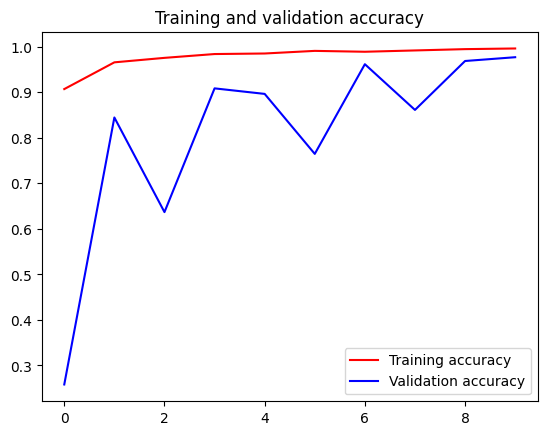

In [19]:
epochs=range(len(acc))

plt.plot(epochs,acc,label='Training accuracy',c='r')
plt.plot(epochs,val_acc,label='Validation accuracy',c='b')
plt.legend(loc=4)
plt.title("Training and validation accuracy")

Text(0.5, 1.0, 'Validation and Training Loss')

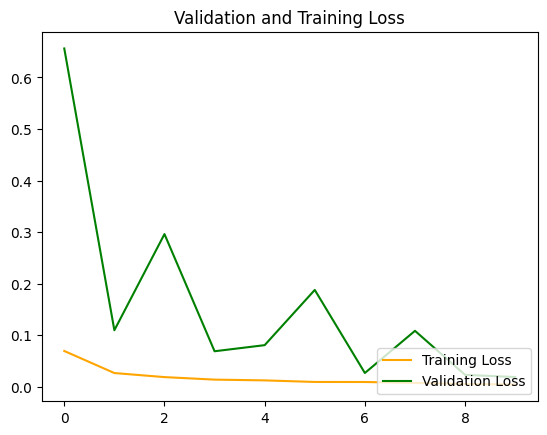

In [20]:
plt.plot(epochs,loss,label='Training Loss',c='orange')
plt.plot(epochs,val_loss,label='Validation Loss',c='green')
plt.legend(loc=4)
plt.title("Validation and Training Loss")

In [21]:
our_predictions=model.predict(test_df)

20/20 [==============================] - 2s 49ms/step


In [22]:
for i in range(5):
    print(our_predictions[i])

[0.99987984]

[0.997529]

[0.99994826]

[0.25259358]

[0.7698306]
